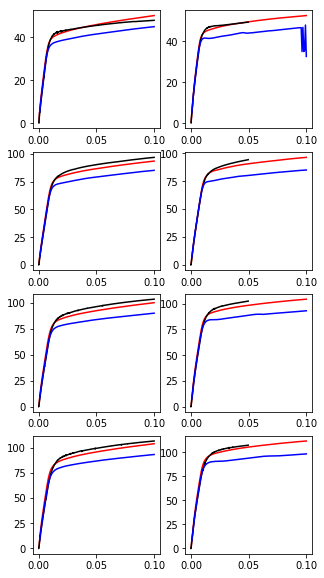

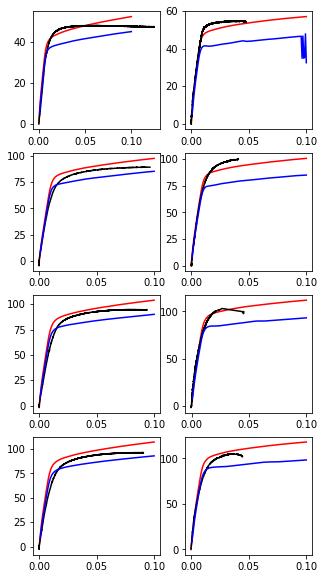

In [10]:
import numpy as np
from Parse_Template import CFST_Cir_tcl
import matplotlib.pyplot as plt

def genTCL(file_path, conditionName):
    bc = 0.04
    dc = 0.01
    bt = 0.008
    bn = 0.008
    d_incr = 0.1
    tol = 1.0E-03
    iter_max = 100
    Es = 200.0E03
    
    file_names = np.loadtxt('file_names.txt', dtype='str')
    conditions = np.loadtxt(conditionName)
    bat_txt = ''
    for i in range(len(conditions)):
        file_name = file_names[i]
        D, t, L, fc, fy, N_axial = conditions[i]
        drift_ratios = [0.1*L]
        Condition = D, t, L, N_axial, fc, bc, dc, fy, fy, bt, bn, Es, tol, iter_max, d_incr, drift_ratios 
        CFST_Cir_tcl(Condition, file_path, file_name)
        bat_txt += 'OpenSees ' + file_name + '.tcl\n'
    f = open(file_path + '/run.bat', 'w')
    f.write(bat_txt)
    f.close()

def plotVerificationEq(pathTest):
    file_path = './Eq'
    conditionName = './condition_Eq.out'
    file_names = np.loadtxt('file_names.txt', dtype='str')
    conditions = np.loadtxt(conditionName)
    #Load Specimen group
    f = open('{0}/Specimen_Group.txt'.format(pathTest), 'r')
    groups = [int(item)-1 for item in f.read().split('\n')[0].split(' ')]
    f.close()

    #Load the specimen data
    Conditions = np.loadtxt('{0}/Specimen_Conditions.txt'.format(pathTest))[groups]
    fig, axes = plt.subplots(4,2, figsize=(5,10))
    axes = axes.flatten()
    for i in range(len(conditions)):
        file_name = file_names[i]
        D, t, L, fc, fy, N_axial = conditions[i]
        drift = np.loadtxt('{0}/{1}.out_disp.out'.format(file_path, file_name)) / L
        force = np.loadtxt('{0}/{1}.out_moment.out'.format(file_path, file_name)) / 1e3 / L
        dataTest = np.loadtxt('{0}/Test/{1:.0f}_Test.txt'.format(pathTest, groups[i]+1)).T
        dataDP = np.loadtxt('{0}/OpenSees_DP/{1:.0f}_DP.out'.format(pathTest, groups[i]+1)).T
        dataTest[0] /= L
        dataDP[0] /= L
        ax = axes[i]
        ax.plot(drift, force, c='r')
        ax.plot(dataTest[0], dataTest[1], c='k')
        ax.plot(dataDP[0], dataDP[1], c='b')

        
def plotVerificationMethod(pathTest):
    file_path = './Method'
    conditionName = './condition_Method.out'
    file_names = np.loadtxt('file_names.txt', dtype='str')
    conditions = np.loadtxt(conditionName)
    #Load Specimen group
    f = open('{0}/Specimen_Group.txt'.format(pathTest), 'r')
    groups = [int(item)-1 for item in f.read().split('\n')[0].split(' ')]
    f.close()

    #Load the specimen data
    Conditions = np.loadtxt('{0}/Specimen_Conditions.txt'.format(pathTest))[groups]
    fig, axes = plt.subplots(4,2, figsize=(5,10))
    axes = axes.flatten()
    for i in range(len(conditions)):
        file_name = file_names[i]
        D, t, L, fc, fy, N_axial = conditions[i]
        drift = np.loadtxt('{0}/{1}.out_disp.out'.format(file_path, file_name)) / L
        force = np.loadtxt('{0}/{1}.out_moment.out'.format(file_path, file_name)) / 1e3 / L
        dataAB = np.loadtxt('{0}/ABAQUS/{1:.0f}_FE.txt'.format(pathTest, groups[i]+1)).T
        dataDP = np.loadtxt('{0}/OpenSees_DP/{1:.0f}_DP.out'.format(pathTest, groups[i]+1)).T
        dataAB[0] /= L
        dataDP[0] /= L
        ax = axes[i]
        ax.plot(drift, force, c='r')
        ax.plot(dataAB[0], dataAB[1], c='k')
        ax.plot(dataDP[0], dataDP[1], c='b')
analysis_type = 1
pathTest = 'D:/Google Drive/Python_Scripts/Test'

if analysis_type==1:
    file_path = './Eq'
    conditionName = './condition_Eq.out'
else:
    file_path = './Method'
    conditionName = './condition_Method.out'

#genTCL(file_path, conditionName)
plotVerificationMethod(pathTest)
plotVerificationEq(pathTest)